In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import utils
import preprocessing

In [2]:
params = { 'max_depth': range(1,8), 'loss': ('deviance', 'exponential'), 'max_features': ('sqrt', 'log2'), 'learning_rate': [0.005, 0.01, 0.05, 0.075, 0.1, 0.25, 0.5] }
model = GradientBoostingClassifier()

### Preprocessing base

In [3]:
df_base = preprocessing.preprocessing_base_parte_1(utils.feature_engineering(utils.get_data()))

In [4]:
gscv_base = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=10)

In [5]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(df_base.drop('tiene_alto_valor_adquisitivo',1), df_base['tiene_alto_valor_adquisitivo'], random_state=112)

In [6]:
%%time
gscv_base.fit(X_train_base, y_train_base)
score_base = roc_auc_score(y_test_base, gscv_base.predict_proba(X_test_base)[:,1])

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

KeyboardInterrupt: 

In [7]:
gscv_base.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 7,
 'max_features': 'sqrt'}

In [8]:
score_base

0.9147201800613648

In [9]:
print(classification_report(y_test_base,gscv_base.predict(X_test_base)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6182
           1       0.77      0.58      0.66      1959

    accuracy                           0.86      8141
   macro avg       0.82      0.76      0.78      8141
weighted avg       0.85      0.86      0.85      8141



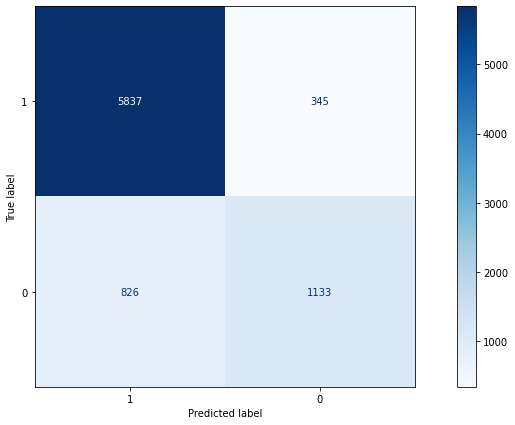

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv_base, X_test_base, y_test_base, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

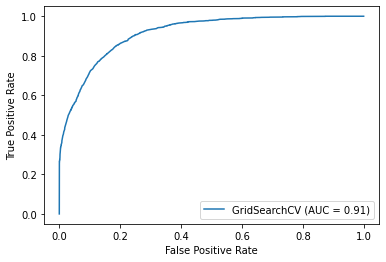

In [11]:
plot_roc_curve(gscv_base, X_test_base, y_test_base)

### Preprocessing Significantes

In [12]:
df_sig, pa_sig = preprocessing.preprocessing_significantes(utils.feature_engineering(utils.get_data()))

In [13]:
gscv_sig = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=10)

In [14]:
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(df_sig, pa_sig, random_state=112)

In [15]:
%%time
gscv_sig.fit(X_train_sig, y_train_sig)
score_sig = roc_auc_score(y_test_sig, gscv_sig.predict_proba(X_test_sig)[:,1])

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 16

CPU times: user 19.6 s, sys: 241 ms, total: 19.8 s
Wall time: 1h 31min 36s


In [16]:
gscv_sig.best_params_

{'learning_rate': 0.075,
 'loss': 'exponential',
 'max_depth': 6,
 'max_features': 'sqrt'}

In [17]:
score_sig

0.9034218793582911

In [18]:
print(classification_report(y_test_sig,gscv_sig.predict(X_test_sig)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6182
           1       0.72      0.59      0.65      1959

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



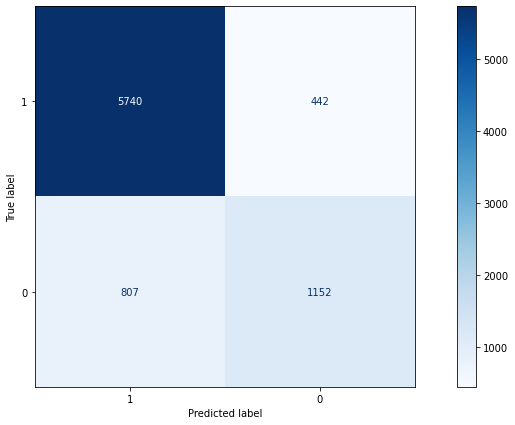

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv_sig, X_test_sig, y_test_sig, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

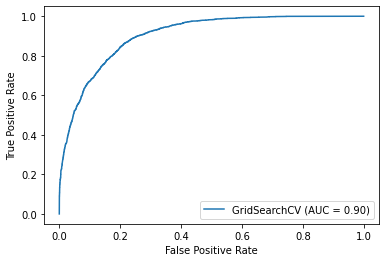

In [20]:
plot_roc_curve(gscv_sig, X_test_sig, y_test_sig)